In [214]:
import pandas as pd
from collections import defaultdict
import csv
from matplotlib import pyplot as plt

**Đọc file clean data** 

In [215]:
df = pd.read_csv('data/clean data.csv')

**Thêm các cột chênh lệch về rồng, sứ giả, trụ phút thứ 15 và chênh lệch về kda (kil - death - assist) giữa các đường**

In [216]:
df["herald_difference"] = df["blue_heralds"] - df["red_heralds"]
df["dragon_difference"] = df["dragon_blue"] - df["dragon_red"]
df["turret_difference"] = df["turret_blue"] - df["turret_red"]

df["kda_difference_top"] = df["kda_top_blue"] - df["kda_top_red"]
df["kda_difference_jungle"] = df["kda_jungle_blue"] - df["kda_jungle_red"]
df["kda_difference_mid"] = df["kda_mid_blue"] - df["kda_mid_red"]
df["kda_difference_ad"] = df["kda_ad_blue"] - df["kda_ad_red"]
df["kda_difference_sp"] = df["kda_sp_blue"] - df["kda_sp_red"]

**Xóa những cột dư thừa sau khi tính chênh lệch**

In [217]:
df = df.drop(['kda_top_blue', 'kda_top_red', 'kda_jungle_blue', 'kda_jungle_red', 'kda_mid_blue', 'kda_mid_red', 
              'kda_ad_blue', 'kda_ad_red', 'kda_sp_blue', 'kda_sp_red', 'link','dragon_blue', 'dragon_red', 'turret_blue', 
              'turret_red', 'blue_heralds', 'red_heralds'], axis=1)

**Làm 1 dictionary về dữ liệu: tướng - vị trí đi đường - vai trò bằng data_champions.csv thu thập được**

In [218]:
# Đọc dữ liệu từ tệp data_champions.csv và tạo từ điển champions_dict
data_champions = pd.read_csv('data/data_champions.csv')
champions_dict = {}
for index, row in data_champions.iterrows():
    champion = row['Champions']
    lane = row['Lane']
    role = row['Role']
    if champion in champions_dict:
        champions_dict[champion]['Lane'].append(lane)
        champions_dict[champion]['Role'].append(role)
    else:
        champions_dict[champion] = {'Lane': [lane], 'Role': [role]}

**Thêm các cột phân loại tướng các đường dựa trên dictionary vừa tạo**

In [219]:
# Duyệt từng hàng trong data_done.csv
for index, row in df.iterrows():
    # Duyệt từng cột tên tướng và trích xuất thông tin về lane và role tương ứng
    for column in ['top_blue', 'top_red', 'jung_blue', 'jung_red', 'mid_blue', 'mid_red', 'ad_blue', 'ad_red', 'support_blue', 'support_red']:
        champion_name = row[column]
        if champion_name not in champions_dict:
            print(f"Warning: Champion {champion_name} not found in champions_dict")
            continue
        lanes = champions_dict[champion_name]['Lane']
        roles = champions_dict[champion_name]['Role']
        lane_col = f"{column}_lane"
        role_col = f"{column}_role"
        df.at[index, lane_col] = ','.join(lanes)
        df.at[index, role_col] = ','.join(roles)

**Lưu vào file data mới**

In [220]:
df.to_csv('data/data_fe.csv', index=False)

**Tính điểm đội hình dựa trên lane, role: nếu có các vị trí, vai trò chính và cần thiết thì +1.**
**Nếu đội hình bị sai/ thừa/ thiếu vị trí thì điểm sẽ thấp hơn những đội hình đầy đủ**

1. Đọc file data feature engineering

In [221]:
df = pd.read_csv("data/data_fe.csv")

2. Duyệt từng hàng, tính điểm cho từng đường và từng vị trí của 2 đội, sau đó cộng vào để lấy điểm tổng của cả 2 đội

In [222]:
# duyệt từng hàng của dataframe
for index, row in df.iterrows():
    score_blue = 0
    score_red = 0
    # kiểm tra lane của các vị trí của đội blue
    if row['top_blue_lane'] == 'top':
        score_blue += 1
    if row['jung_blue_lane'] == 'jungle':
        score_blue += 1
    if row['mid_blue_lane'] == 'mid':
        score_blue += 1
    if row['ad_blue_lane'] == 'adc':
        score_blue += 1
    if row['support_blue_lane'] == 'support':
        score_blue += 1
    # kiểm tra lane của các vị trí của đội red
    if row['top_red_lane'] == 'top':
        score_red += 1
    if row['jung_red_lane'] == 'jungle':
        score_red += 1
    if row['mid_red_lane'] == 'mid':
        score_red += 1
    if row['ad_red_lane'] == 'adc':
        score_red += 1
    if row['support_red_lane'] == 'support':
        score_red += 1
    df.loc[index, 'score_blue'] = score_blue
    df.loc[index, 'score_red'] = score_red

    score_blue_role = {'Marksman': 0, 'Fighter': 0, 'Tank': 0, 'Assassin': 0, 'Mage': 0, 'Support': 0}
    score_red_role = {'Marksman': 0, 'Fighter': 0, 'Tank': 0, 'Assassin': 0, 'Mage': 0, 'Support': 0}
    for position in ['top_blue_role', 'jung_blue_role', 'mid_blue_role', 'ad_blue_role', 'support_blue_role']:
        role = row[position]
        if role == 'Marksman':
            score_blue_role['Marksman'] = 1
        elif role == 'Fighter':
            score_blue_role['Fighter'] = 1
        elif role == 'Tank':
            score_blue_role['Tank'] = 1
        elif role == 'Assassin':
            score_blue_role['Assassin'] = 1
        elif role == 'Mage':
            score_blue_role['Mage'] = 1
        elif role == 'Support':
            score_blue_role['Support'] = 1
    # kiểm tra role của các vị trí của đội red
    for position in ['top_red_role', 'jung_red_role', 'mid_red_role', 'ad_red_role', 'support_red_role']:
        role = row[position]
        if role == 'Marksman':
            score_red_role['Marksman'] = 1
        elif role == 'Fighter':
            score_red_role['Fighter'] = 1
        elif role == 'Tank':
            score_red_role['Tank'] = 1
        elif role == 'Assassin':
            score_red_role['Assassin'] = 1
        elif role == 'Mage':
            score_red_role['Mage'] = 1
        elif role == 'Support':
            score_red_role['Support'] = 1
    # lưu score_blue_role, score_red_role vào 2 cột
    df.loc[index, 'score_blue_role'] = sum(score_blue_role.values())
    df.loc[index, 'score_red_role'] = sum(score_red_role.values())

3. Lưu điểm vào file csv

In [223]:
df.to_csv('data/data_fe.csv', index=False)

4. Tính chênh lệch điểm giữa 2 đội 

In [224]:
df["score_lane"] = df["score_blue"] - df["score_red"]
df["score_role"] = df["score_blue_role"] - df["score_red_role"]

5. Xóa các cột dư thừa sau khi tính chênh lệch

In [225]:
df = df.drop(['top_blue_lane', 'top_red_lane', 'jung_blue_lane', 'jung_red_lane', 'mid_blue_lane', 'mid_red_lane', 'ad_blue_lane', 
              'ad_red_lane', 'support_blue_lane', 'support_red_lane', 'top_blue_role', 'top_red_role', 'jung_blue_role', 'jung_red_role', 
              'mid_blue_role', 'mid_red_role', 'ad_blue_role', 'ad_red_role', 'support_blue_role', 'support_red_role', 'score_blue'
              , 'score_red' ,'score_blue_role' , 'score_red_role'], axis=1)

5. Lưu lại data vào data_fe.csv (data feature engineering)

In [226]:
df.to_csv("data/data_fe.csv", index=False)

**Chia 10k dữ liệu thành 10 file, mỗi file 1k**

In [227]:
df = pd.read_csv('data/data_fe.csv')

# Drop các cột bị dư thừa
df = df.drop(['top_blue', 'top_red', 'jung_blue', 'jung_red', 'mid_blue', 'mid_red', 'ad_blue', 'ad_red', 'support_blue', 'support_red'], axis=1)

# Chuyển đổi team thắng sang 0 1 để dùng model dự đoán
df['team_win'] = df['team_win'].replace({'blue': 1, 'red': 0})

# Lưu dữ liệu trộn vào file CSV
df.to_csv('data/data_fe.csv', index=False)

In [228]:
for i in range(10):
    start_index = i * 1000
    end_index = start_index + 1000
    df_subset = df.iloc[start_index:end_index, :]
    filename = f"data/data extracted/data_fe_1000_part_{i+1}.csv"
    df_subset.to_csv(filename, index=False)

**Viết thêm 1 bộ dữ liệu có xử lý ngoại lệ để so sánh và lựa chọn**

*Vẽ phân bố của chênh lệch vàng phút 15 trước khi xử lý ngoại lệ*

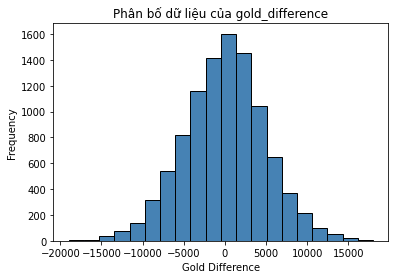

In [229]:
# Đọc dữ liệu từ file csv vào DataFrame

df = pd.read_csv("data/data_fe.csv")

# Lấy cột "gold_difference"
gold_diff = df["gold_difference"]

# Vẽ biểu đồ phân bố dữ liệu
plt.hist(gold_diff, bins=20, color='steelblue', edgecolor='black')

# Thiết lập tiêu đề và nhãn trục
plt.title("Phân bố dữ liệu của gold_difference")
plt.xlabel("Gold Difference")
plt.ylabel("Frequency")

# Hiển thị biểu đồ
plt.show()

*Vẽ phân bố và chênh lệch vàng sau khi xử lý ngoại lệ*

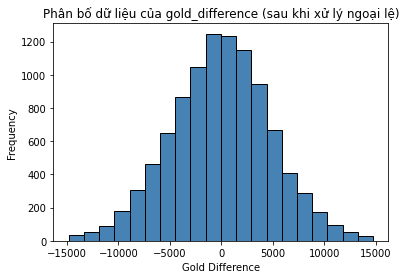

In [230]:
# Lấy cột "gold_difference"
gold_diff = df["gold_difference"]

# Tính toán giá trị trung bình và độ lệch chuẩn
mean = gold_diff.mean()
std = gold_diff.std()

# Định nghĩa giới hạn trên và dưới dựa trên độ lệch chuẩn (ví dụ: 3 độ lệch chuẩn)
threshold = 3
lower_bound = mean - (threshold * std)
upper_bound = mean + (threshold * std)

# Loại bỏ các giá trị ngoại lệ
gold_diff_cleaned = gold_diff[(gold_diff >= lower_bound) & (gold_diff <= upper_bound)]
df_cleaned = df[(df["gold_difference"] >= lower_bound) & (df["gold_difference"] <= upper_bound)]

# Lưu DataFrame mới vào file CSV
df_cleaned.to_csv("data/data_fe_cleaned.csv", index=False)

# Vẽ biểu đồ phân bố dữ liệu sau khi xử lý ngoại lệ
plt.hist(gold_diff_cleaned, bins=20, color='steelblue', edgecolor='black')
plt.title("Phân bố dữ liệu của gold_difference (sau khi xử lý ngoại lệ)")
plt.xlabel("Gold Difference")
plt.ylabel("Frequency")

plt.show()